# <div style="text-align: center"> Taller 2 </div>  
<div style="text-align: center"> Alejandro Alayón Suárez - 201316083</div>
___

In [98]:
import scipy as sp
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

<div style="text-align: justify">Para el desarrollo del presente taller se utilizaron los parámetros del kart planteados por Córdoba y Clavijo los cuales son expuestos a continuación.</div> 

In [99]:
g=9.81 #(m/s^2)
rho=1.1955 #Densidad del aire (kg/m^3)
masa=152 #Masa del kart (kg)
w=masa*g #Peso del kart (N)
Cd=0.89 #Coeficiente de arrastre
dll= 0.975 #Distancia entre ejes de llantas traseras (m)
alj= 0.88 # Altura del kart con piloto de 1.68 m (m)
Af= dll*alj/2 #Area frontal (m^2)
a=0.2231 # Distancia del centro de gravedad al eje de la llanta trasera (m)
l=1.0063 # Distancia de eje de las llantas traseras y delanteras (m)
h=0.07478 # Altura del centro de gravedad del kart con respecto al piso (m)
ng=3.2 #Relación de transmisión (también puede ser 3.4)
rll=0.139 #Radio geométrico de las llantas traseras (m)
refc=0.98*rll #Radio efectivo de las llantas traseras (m)
nu=0.95 #Eficiencia total de la transmisión
reje=0.02 # Radio eje de las llantas (m)
meje=3.832 # Masa del eje (kg)
ieje=(meje*reje**2)/2.0 # Inercia del eje de las llantas (kg-m^2)
ii=5.2E-3 # Inercia motor eléctrico (kg m^2)
mllt=1.43 # Masa llantas traseras (kg)
mlld=1.20 # Masa llantas delanteras (kg)
rlld=0.129 # Radio llantas delanteras (m)
rind=0.0631 # Radio rin llantas delanteras (m)
rin=0.0631 #radio interno del neumático (m)
mbt=0.7*mllt # El porcentaje de la masa total que pesa la parte "banda" de la llanta trasera
mdt=0.3*mllt # El porcentaje de la masa total que pesa la parte "disco" de la llanta trasera
mbd=0.7*mlld # El porcentaje de la masa total que pesa la parte "banda" de la llanta delantera
mdd=0.3*mlld # El porcentaje de la masa total que pesa la parte "disco" de la llanta delantera
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)

#Variables a analizar
masa=152 #Masa del kart (kg)
Cd=0.89 #Coeficiente de arrastre
ng=3.2 #Relación de transmisión (también puede ser 3.4)

## <div style="text-align: justify">1. Desempeño en la aceleración del kart </div>
___
<div style="text-align: justify"> Por la segunda ley de Newton se puede establecer que las fuerzas que rigen un kart en movimiento están contenidas en la siguiente ecuacion:</div>  
<div style="text-align: center">$Ma_x=F_x-R_x-D_A$</div>  
<div style="text-align: justify"> Donde $F_x$ es la fuerza de tracción en las llantas la cual está definida a continuación:</div>  
<div style="text-align: center">$F_x=\frac{TN_g\eta}{r}-(I_w+I_d+I_eN_g^2)\frac{a_x}{r^2}$</div>  
<div style="text-align: center">$T=\frac{P}{\omega}$</div>  
<div style="text-align: center">$P=3.037((-0.00000004564538677\omega^3)+(0.0001056995459\omega^2)+(1.53209191\omega)-1.895523696)$</div>  
<div style="text-align: center">$\omega=\frac{v_xN_g}{r}$</div>    
$T$ =Torque producido por el motor eléctrico.   
$P$ =Potencia del motor.  
$\omega$ =Velocidad angular del motor.  
$N_g$ =Relación de transmisión.  
$\eta$ =Eficiencia de la transmisión.  
$r$ =Radio efectivo de las llantas tractivas.  
$I_w$ =Momento de inercia de las llantas.  
$I_d$ =Momento de inercia de el eje.  
$I_e$ =Momento de inercia del motor.  
$a_x$ =Aceleración del kart.  
$v_x$ =Velocidad del kart.   
<br><div style="text-align: justify"> Ahora bien, $R_x$ representa la fuerza de resistencia a la rodadura que presenta el kart, esta puede ser considerada como constante con la aceleración ($Rc_x$) o variable con esta ($Rv_x$) dependiendo la complejidad del modelo que se quiera tener:</div>  
<div style="text-align: center">$Rc_x=0.01w(1+\frac{v_x}{100})$</div>  
<div style="text-align: center">$Rv_x=0.01w(1+\frac{v_x}{100})(\frac{a}{l}+\frac{a_x}{g}\frac{h}{l})$</div>  
$w$ =Peso del kart.  
$v_x$ =Velocidad del kart.    
$a$ =Distancia del centro de gravedad al eje de la llanta trasera.  
$l$ =Distancia de eje de las llantas traseras y delanteras.  
$h$ =Altura del centro de gravedad del kart con respecto al piso.  
$g$ =Gravedad.  
<br><div style="text-align: justify"> Finalmente, $D_A$ representa la fuerza de arrastre que se opone al kart en su avance y está definida por la siguiente ecuación:</div>  
<div style="text-align: center">$D_A=\frac{1}{2}\rho A_fC_dv_x^2$</div>
$\rho$ =Densidad del aire.  
$A_f$ =Area frontral del kart.  
$C_f$ =Coeficiente de arrastre.  
$v_x$ =Velocidad del kart.     
<br><div style="text-align: justify"> El fin último del modelo es poder establecer la velocidad del kart en un tiempo dado, por lo tanto es necesario plantear una ecuación diferencial de la forma:</div>  
<div style="text-align: center">$a_x=\frac{\partial v_x}{\partial t} = f(v_x,t)$</div>



In [100]:
# Función que calcula el torque producido por el motor según la velocidad lineal del kart.
def Torq(vel):
    
    omega=(vel*ng)/refc #Velocidad angular del motor (rad/s)
    
    if omega.all() > 5000*2*np.pi/60:
        omega=5000*2*np.pi/60
        
    P=3.037*((-0.00000004564538677*omega**3)+(0.0001056995459*omega**2)+(1.53209191*omega)-1.895523696)
    
    if omega.all() == 0:
        T=0
    else:
        T=P/omega
            
    return T

In [101]:
# Función que calcula la fuerza de tracción producida por el motor eléctrico sobre el kart según la velocidad y aceleración del mismo.
def Ftrac(vel,acl):
        
    Ftracx=(Torq(vel)*ng*nu)/refc-((illt*2+ieje+ii*ng**2))*(acl/(refc**2))
    
    return Ftracx

In [102]:
# Función que calcula la fuerza de resistencia a la rodadura variable con la aceleración y velocidad
def Fresr(vel,acl):
    fr=0.01*(1+(vel/100))
    wr=w*((a/l)+(acl/g)*(h/l))
    return fr*wr

In [103]:
# Función que calcula la fuerza de resistencia a la rodadura constante con la aceleración y variable con la velocidad
def Fresrc(vel):
    fr=0.01*(1+(vel/100))
    return fr*w

In [104]:
# Función que calcula la fuerza de resistencia al viento o fuerza de arrastre sobre el kart dependiendo de la velocidad del mismo
def Fdrag(vel): 
    return 0.5*rho*Af*Cd*vel**2

### 1.1 Modelo para resistencia a la rodadura constante 
___

<div style="text-align: jusify">Tal como se menciono anterioirmente, para poder resolver la ecuación diferencial esta debe tener la siguiente forma:</div>  
<div style="text-align: center">$a_x=\frac{\partial v_x}{\partial t} = f(v_x,t)$</div>  
<div style="text-align: jusify">Por lo tanto, para la resitencia a la rodadura constante con la aceleración se tiene la siguiente ecuación:</div>   
<div style="text-align: center">$\frac{\partial v_x}{\partial t} =\frac{\frac{TN_g\eta}{r}-R_x-D_A}{M+\frac{(I_w+I_d+I_eN_g^2)}{r^2}}$</div> 

In [105]:
# Ecuación diferencial de la forma dv/dt=f(t,v) considerando la resistencia a la rodadura constante con la aceleración
def acel(t,vel):
    
    num=((Torq(vel)*ng*nu)/refc)-Fresrc(vel)-Fdrag(vel)
    den=(masa+((illt*2+ieje+ii*ng**2)/(refc**2)))
    a=num/den
    
    return a

In [106]:
# Solver por RK45 de la ecuación diferencial
sol=integrate.solve_ivp(acel,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [107]:
# Ajuste de los arreglos
art=acel(0,sol.y[0,:])
vel2=np.append([0],sol.y)
art2=np.append([0],art)
t2=np.append([0],sol.t)

### 1.2 Modelo para resistencia a la rodadura variable
___
<div style="text-align: jusify">Por su parte, para la resitencia a la rodadura variable con la aceleración se obtiene la siguiente ecuación:</div>   
<div style="text-align: center">$\frac{\partial v_x}{\partial t} =\frac{\frac{TN_g\eta}{r}-0.01w(1+\frac{v_x}{100})\frac{a}{l}-D_A}{M+\frac{(I_w+I_d+I_eN_g^2)}{r^2}+0.01\frac{w}{g}(1+\frac{v_x}{100})\frac{h}{l}}$</div> 

In [108]:
# Ecuación diferencial de la forma dv/dt=f(t,v) considerando la resistencia a la rodadura variable con la aceleración
def acel2(t,vel):
    
    alpha=(Torq(vel)*ng*nu)/refc
    beta=masa+((illt*2+ieje+ii*ng**2)/(refc**2))
    gama=(0.01*(1+(vel/100)))*w
    
    num=alpha-gama*(a/l)-Fdrag(vel)
    den=beta+(gama/g)*(h/l)
    a2=num/den
    
    return a2

In [15]:
# Solver por RK45 de la ecuación diferencial
sol2=integrate.solve_ivp(acel2,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [60]:
# Ajuste de los arreglos
art3=acel2(0,sol2.y[0,:])
vel3=np.append([0],sol2.y)
art4=np.append([0],art3)
t3=np.append([0],sol2.t)

### 1.3 Comparación de los modelos
___
<div style="text-align: jusify">Es preciso establecer cuál modelo es pertienente utilizar para continuar con el desarrollo de la simulación para el kart. Con este objetivo se graficó la velocidad y la aceleración que alcanza el kart en un periodo de 300 segundos par ambos modelos.</div>   


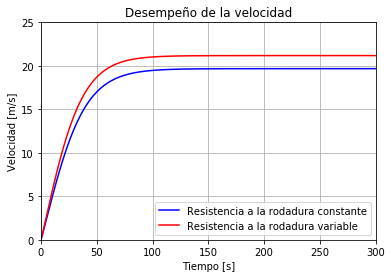

In [61]:
#Graficación comparativa de la velocidad

plt.title('Desempeño de la velocidad')
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")
    
plt.plot(t2, vel2, 'b', label='Resistencia a la rodadura constante')
plt.plot(t3, vel3, 'r', label='Resistencia a la rodadura variable')
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,25])
        
plt.legend(loc='lower right')
plt.grid()
plt.show()

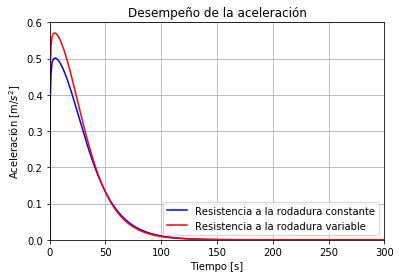

In [109]:
#Graficación comparativa de la aceleración

plt.title('Desempeño de la aceleración')
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleración [m/$s^2$]")
    
plt.plot(t2, art2, 'b', label='Resistencia a la rodadura constante')
plt.plot(t3, art4, 'r', label='Resistencia a la rodadura variable')
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,0.6])
        
plt.legend(loc='lower right')
plt.grid()
plt.show()

<div style="text-align: justify">Si se observan los resultados obtenidos es evidente que el modelo que considera la resistencia a la rodadura constante subestima los valores tanto de velocidad como aceleración máximos. Es por esto, que para el desarrollo de la simuación es pertinente utilizar el modelo que considera la resistencia a la rodadura variable con la velocidad, ya que es más completo y preciso. </div>   

## <div style="text-align: justify">2. Desempeño en la desaceleración del kart (frenado) </div>  
___
<div style="text-align: justify">A continuación se plantea un modelo matemático para la solución de las ecuaciones de frenado para el kart:</div><br>
<div style="text-align: center">$\frac{\partial v_x}{\partial t} =\frac{-\frac{T_b}{r}-0.01w(1+\frac{v_x}{100})\frac{a}{l}-D_A}{M+\frac{(I_w+I_d+I_eN_g^2)}{r^2}+0.01\frac{w}{g}(1+\frac{v_x}{100})\frac{h}{l}}$</div><br>

<div style="text-align: justify">La única diferencia que presenta dicho modelo con respecto al de aceleración con resistencia a la rodadura variable es el término $T_b$, el cual representa el torque de frenado y va acompañado de un signo negativo ya que se opone a la dirección del movimiento:</div>

In [44]:
# Torque de frenado para un kart eléctrico tomado de:
# https://www.ijraset.com/fileserve.php?FID=6146
Tb=98.669*2+431.14 

In [45]:
# Ecuación diferencial de la forma dv/dt=f(t,v) considerando la resistencia a la rodadura variable con la aceleración
def fren(t,vel):
    
    alpha=Tb/refc
    beta=masa+((illt*2+ieje+ii*ng**2)/(refc**2))
    gama=(0.01*(1+(vel/100)))*w
    
    num=-alpha-gama*(a/l)-Fdrag(vel)
    den=beta+(gama/g)*(h/l)
        
    fr=num/den
    
    return fr

In [46]:
# Solver por RK45 de la ecuación diferencial con punto inicial en la velocidad máxima
V_in=vel3.max()
sol3=integrate.solve_ivp(fren,[0,0.77],[V_in], method='RK45',max_step=0.005)

In [47]:
# Ajuste de los arreglos
art5=fren(0,sol3.y[0,:])
vel4=np.append(sol3.y,[0])
art6=np.append([0],art5)
t4=np.append([0],sol3.t)

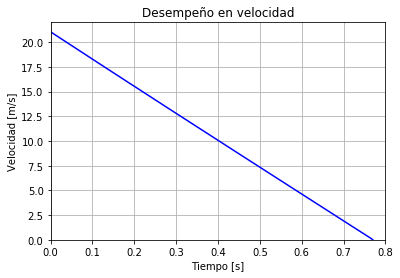

In [48]:
#Velocidad
plt.plot(t4, vel4, 'b', label='posición(t)')
axes = plt.gca()
axes.set_xlim([0,0.8])
axes.set_ylim([0,22])
plt.title('Desempeño en velocidad')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.grid()
plt.show()

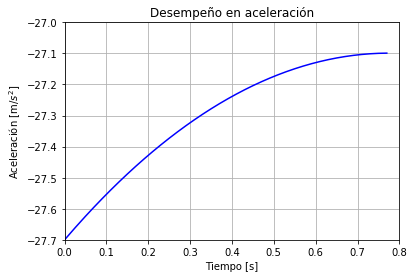

In [49]:
# Aceleración
plt.plot(sol3.t,art5, 'b', label='posición(t)')
axes = plt.gca()
axes.set_xlim([0,0.8])
axes.set_ylim([-27.7,-27])
plt.title('Desempeño en aceleración')
plt.xlabel('Tiempo [s]')
plt.ylabel('Aceleración [m/$s^2$]')
plt.grid()
plt.show()

## <div style="text-align: justify">3. Modelo arrancada y frenado </div>
___
<div style="text-align: justify">A continuación se plantea un modelo matemático para el calculo del tiempo y la distancia que toma llevar el kart a velocidad máxima y frenado total.</div> 

In [26]:
# Ciclo que calcula cuando deja de haber un cambio significativo en la velocidad
tol=0.14
newarr =[]
for i in range(0,len(vel3)):
    if ((vel3[i]-vel3[i-1]))>=tol:
        
        newarr.append(vel3[i])
    
newarr1=np.append([0],newarr)
tnew=t3[:len(newarr1)]


In [27]:
distvelmax=integrate.trapz(newarr1,tnew)
timevelmax=tnew[-1]
distbrk=integrate.trapz(vel4,t4)
timebrk=t4[-1]

In [28]:
print('El kart acelera de 0 a', round(newarr1.max(),2),'m/s en un tiempo de',round(timevelmax,2),'s y recorriendo un distancia de',round(distvelmax,2),'m.')
print('El kart desacelera de', round(newarr1.max(),2), 'a 0 m/s en un tiempo de',round(timebrk,2),'s y reccorre un distancia de',round(distbrk,2),'m.')

El kart acelera de 0 a 18.58 m/s en un tiempo de 46.11 s y recorriendo un distancia de 552.17 m.
El kart desacelera de 18.58 a 0 m/s en un tiempo de 0.77 s y reccorre un distancia de 8.08 m.


## <div style="text-align: justify">4. Variación de parámetros </div>  
___
<div style="text-align: justify">Con el objetivo de identificar como los parámetros del kart que dictan los modelos matemáticos afectan la velocidad y aceleración del mismo se tomaron como variables los siguintes valores:</div>   

* $M$=Masa [152 kg, 162 kg y 172 kg]  
* $N_g$=Relación de transmisión [3.2 y 3.4]   
* $C_f$=Coeficiente de arrastre [0.80, 0.85 y 0.89]  



### <div style="text-align: justify">4.1 Masa </div>
___


In [57]:
mv=152 # o 162 o 172 [kg]
wv=mv*g

def acelmv(t,vel):
    
    alpha=(Torq(vel)*ng*nu)/refc
    beta=mv+((illt*2+ieje+ii*ng**2)/(refc**2))
    gama=(0.01*(1+(vel/100)))*wv
    
    num=alpha-gama*(a/l)-Fdrag(vel)
    den=beta+(gama/g)*(h/l)
    a2=num/den
    
    return a2


In [54]:
solm1=integrate.solve_ivp(acelmv,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [56]:
solm2=integrate.solve_ivp(acelmv,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [58]:
solm3=integrate.solve_ivp(acelmv,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [65]:
# Ajuste de los arreglos m1
artm11=acelmv(0,solm1.y[0,:])
velm1=np.append([0],solm1.y)
artm12=np.append([0],artm11)
tm1=np.append([0],solm1.t)

# Ajuste de los arreglos m2
artm21=acelmv(0,solm2.y[0,:])
velm2=np.append([0],solm2.y)
artm22=np.append([0],artm21)
tm2=np.append([0],solm2.t)

# Ajuste de los arreglos m3
artm31=acelmv(0,solm3.y[0,:])
velm3=np.append([0],solm3.y)
artm32=np.append([0],artm31)
tm3=np.append([0],solm3.t)

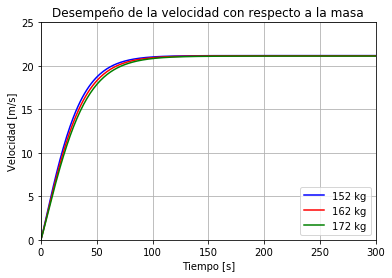

In [74]:
#Graficación comparativa de la velocidad

plt.title('Desempeño de la velocidad con respecto a la masa')
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")
    
plt.plot(tm1, velm1, 'b', label='152 kg')
plt.plot(tm2, velm2, 'r', label='162 kg')
plt.plot(tm3, velm3, 'g', label='172 kg')
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,25])
        
plt.legend(loc='lower right')
plt.grid()
plt.show()

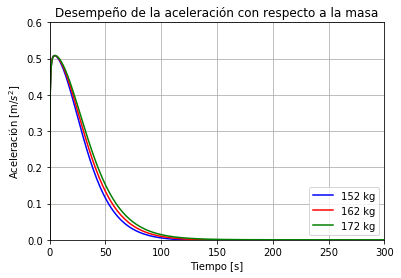

In [72]:
#Graficación comparativa de la aceleración

plt.title('Desempeño de la aceleración con respecto a la masa')
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleración [m/$s^2$]")
    
plt.plot(tm1, artm12, 'b', label='152 kg')
plt.plot(tm2, artm22, 'r', label='162 kg')
plt.plot(tm3, artm32, 'g', label='172 kg')
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,0.6])
        
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [94]:
print('El kart aumenta su velocidad máxima en', round(max(velm1)-max(velm3),3),'m/s si su masa se disminuye en 20 kg')

El kart aumenta su velocidad máxima en 0.055 m/s si su masa se disminuye en 20 kg


<div style="text-align: justify">Tal como se puede apreciar en las gráficas de velocidad y aceleración, entre menor es la masa del kart se alcanza con mayor rapidez la velocidad máxima (la cual también es mayor), esto se debe a que la masa afecta negativamente al modelo planteado en el factor de fuerza de rodadura y divide en sí toda la expresión.</div>   


### <div style="text-align: justify">4.2 Relación de transmisión </div>
___


In [85]:
Ngv= 3.2 # o 3.4

def TorqNgv(vel):
    
    omega=(vel*Ngv)/refc #Velocidad angular del motor (rad/s)
    
    if omega.all() > 5000*2*np.pi/60:
        omega=5000*2*np.pi/60
        
    P=3.037*((-0.00000004564538677*omega**3)+(0.0001056995459*omega**2)+(1.53209191*omega)-1.895523696)
    
    if omega.all() == 0:
        T=0
    else:
        T=P/omega
            
    return T

def acelNgv(t,vel):
    
    alpha=(TorqNgv(vel)*Ngv*nu)/refc
    beta=masa+((illt*2+ieje+ii*Ngv**2)/(refc**2))
    gama=(0.01*(1+(vel/100)))*w
    
    num=alpha-gama*(a/l)-Fdrag(vel)
    den=beta+(gama/g)*(h/l)
    a2=num/den
    
    return a2

In [84]:
solNg1=integrate.solve_ivp(acelNgv,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [86]:
solNg2=integrate.solve_ivp(acelNgv,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [87]:
# Ajuste de los arreglos Ng1
artNg11=acelNgv(0,solNg1.y[0,:])
velNg1=np.append([0],solNg1.y)
artNg12=np.append([0],artNg11)
tNg1=np.append([0],solNg1.t)

# Ajuste de los arreglos Ng2
artNg21=acelNgv(0,solNg2.y[0,:])
velNg2=np.append([0],solNg2.y)
artNg22=np.append([0],artNg21)
tNg2=np.append([0],solNg2.t)

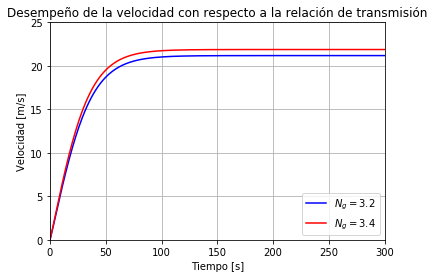

In [89]:
#Graficación comparativa de la velocidad

plt.title('Desempeño de la velocidad con respecto a la relación de transmisión')
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")
    
plt.plot(tNg1, velNg1, 'b', label='$N_g=3.2$')
plt.plot(tNg2, velNg2, 'r', label='$N_g=3.4$')
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,25])
        
plt.legend(loc='lower right')
plt.grid()
plt.show()

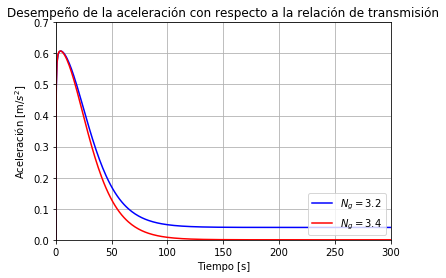

In [97]:
#Graficación comparativa de la aceleración

plt.title('Desempeño de la aceleración con respecto a la relación de transmisión')
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleración [m/$s^2$]")
    
plt.plot(tNg1, artNg12, 'b', label='$N_g=3.2$')
plt.plot(tNg2, artNg22, 'r', label='$N_g=3.4$')
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,0.7])
        
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [95]:
print('El kart aumenta su velocidad máxima en', round(max(velNg2)-max(velNg1),2),'m/s si su relación de transmisión cambia a 3.4')

El kart aumenta su velocidad máxima en 0.7 m/s si su relación de transmisión cambia a 3.4


<div style="text-align: justify">Tal como se puede apreciar en las gráficas de velocidad y aceleración, si se cambia la relación de transmisión de 3.2 a 3.4 se logra aumentar la velocidad máxima en un valor cercano a 1 m/s, esto se debe a que dicha relación afecta positivamente la potencia generada por el motor y por ende la fuerza de tracción. Sin embargo, también afecta negativamente la torque y a los momentos de inercia por lo que su incremento podría ser contra producente en algún punto. </div>   


### <div style="text-align: justify">4.3 Coefciente de arraste </div>
___


In [121]:
Cdv= 0.80 # o 0.85 o 0.89

def FdragCdv(vel): 
    return 0.5*rho*Af*Cdv*vel**2

def acelCdv(t,vel):
    
    alpha=(Torq(vel)*ng*nu)/refc
    beta=masa+((illt*2+ieje+ii*ng**2)/(refc**2))
    gama=(0.01*(1+(vel/100)))*w
    
    num=alpha-gama*(a/l)-FdragCdv(vel)
    den=beta+(gama/g)*(h/l)
    a2=num/den
    
    return a2

In [118]:
solCd1=integrate.solve_ivp(acelCdv,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [120]:
solCd2=integrate.solve_ivp(acelCdv,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [122]:
solCd3=integrate.solve_ivp(acelCdv,[0000.1,300],[0000.1], method='RK45',max_step=1)

In [126]:
# Ajuste de los arreglos Cd1
artCd11=acelCdv(0,solCd1.y[0,:])
velCd1=np.append([0],solCd1.y)
artCd12=np.append([0],artCd11)
tCd1=np.append([0],solCd1.t)

# Ajuste de los arreglos Cd2
artCd21=acelCdv(0,solCd2.y[0,:])
velCd2=np.append([0],solCd2.y)
artCd22=np.append([0],artCd21)
tCd2=np.append([0],solCd2.t)

# Ajuste de los arreglos m3
artCd31=acelCdv(0,solCd3.y[0,:])
velCd3=np.append([0],solCd3.y)
artCd32=np.append([0],artCd31)
tCd3=np.append([0],solCd3.t)

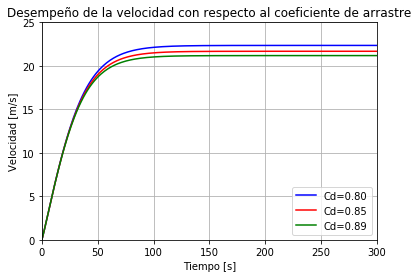

In [128]:
#Graficación comparativa de la velocidad

plt.title('Desempeño de la velocidad con respecto al coeficiente de arrastre')
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")
    
plt.plot(tCd1, velCd1, 'b', label='Cd=0.80')
plt.plot(tCd2, velCd2, 'r', label='Cd=0.85')
plt.plot(tCd3, velCd3, 'g', label='Cd=0.89')
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([0,25])
        
plt.legend(loc='lower right')
plt.grid()
plt.show()

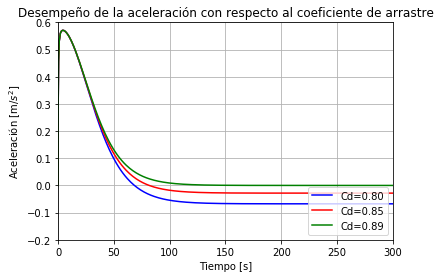

In [131]:
#Graficación comparativa de la aceleración

plt.title('Desempeño de la aceleración con respecto al coeficiente de arrastre')
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleración [m/$s^2$]")
    
plt.plot(tCd1, artCd12, 'b', label='Cd=0.80')
plt.plot(tCd2, artCd22, 'r', label='Cd=0.85')
plt.plot(tCd3, artCd32, 'g', label='Cd=0.89')
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([-0.2,0.6])
        
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [134]:
print('El kart aumenta su velocidad máxima en', round(max(velCd1)-max(velCd3),3),'m/s si su coeficiente de arrastre disminuye de 0.89 a 0.80')

El kart aumenta su velocidad máxima en 1.169 m/s si su coeficiente de arrastre disminuye de 0.89 a 0.80


<div style="text-align: justify">Tal como se puede apreciar en las gráficas de velocidad y aceleración, si se disminuye el coeficiente de arrastre la velocidad máxima aumenta, esto era de esperarse ya que el coeficiente de arraste es el principal componente de la fuerza de arrastre la cual se opóne al movimiento del kart. Sin emabrgo, se aprecia un comportamiento específico en la aceleración ya que a menor coeficiente de arraste el kart alcanza la velocidad máxima permitida por el motor lo que provoca que el kart se desacelere.</div>